In [445]:
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
data = pd.read_excel("video_game_market.xlsx","genrePC")

data.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,"Retour au menu ""Marché du jeu vidéo""",NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Marché du jeu vidéo PC selon le genre,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Le marché des jeux vidéo PC selon le genre (mi...,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,2017.00,2018.00,2019.00,2020.00,2021.00
7,action,597366.54,503639.42,451063.97,694736.22,502794.67
8,stratégie,658888.22,616128.93,495256.70,539665.58,458420.13
9,aventure,229472.85,220322.38,229000.10,442130.00,265875.10


In [163]:
data_clean = data.dropna(axis = 0, how = 'all')
data_clean = data_clean.dropna(axis = 0,thresh=5)
data_clean = data_clean.fillna("Non communiqué")
data_clean = data_clean.rename(columns={"Unnamed: 0": "Genre", "Unnamed: 1": "2017", "Unnamed: 2": "2018", "Unnamed: 3": "2019", "Unnamed: 4": "2020", "Unnamed: 5": "2021"}).set_index("Genre")

data_clean.head(15)

,2017,2018,2019,2020,2021
Genre,,,,,
Non communiqué,2017.00,2018.00,2019.00,2020.00,2021.00
action,597366.54,503639.42,451063.97,694736.22,502794.67
stratégie,658888.22,616128.93,495256.70,539665.58,458420.13
aventure,229472.85,220322.38,229000.10,442130.00,265875.10
jeu de tirs,502472.87,416841.88,436295.00,411191.30,278309.37
jeu de rôles,291465.39,346975.06,246741.99,379377.63,279319.54
sport,118805.58,113569.72,104128.94,138894.42,98938.74
course,97222.20,112007.92,90894.55,68931.97,55378.77
combat,62473.86,69175.16,50464.90,65324.61,80301.01


In [167]:
df_genre = data_clean.iloc[1:17]

df_genre

,2017,2018,2019,2020,2021
Genre,,,,,
action,597366.54,503639.42,451063.97,694736.22,502794.67
stratégie,658888.22,616128.93,495256.70,539665.58,458420.13
aventure,229472.85,220322.38,229000.10,442130.00,265875.10
jeu de tirs,502472.87,416841.88,436295.00,411191.30,278309.37
jeu de rôles,291465.39,346975.06,246741.99,379377.63,279319.54
sport,118805.58,113569.72,104128.94,138894.42,98938.74
course,97222.20,112007.92,90894.55,68931.97,55378.77
combat,62473.86,69175.16,50464.90,65324.61,80301.01
jeu casual,67856.23,44341.97,36328.40,63233.25,42503.67


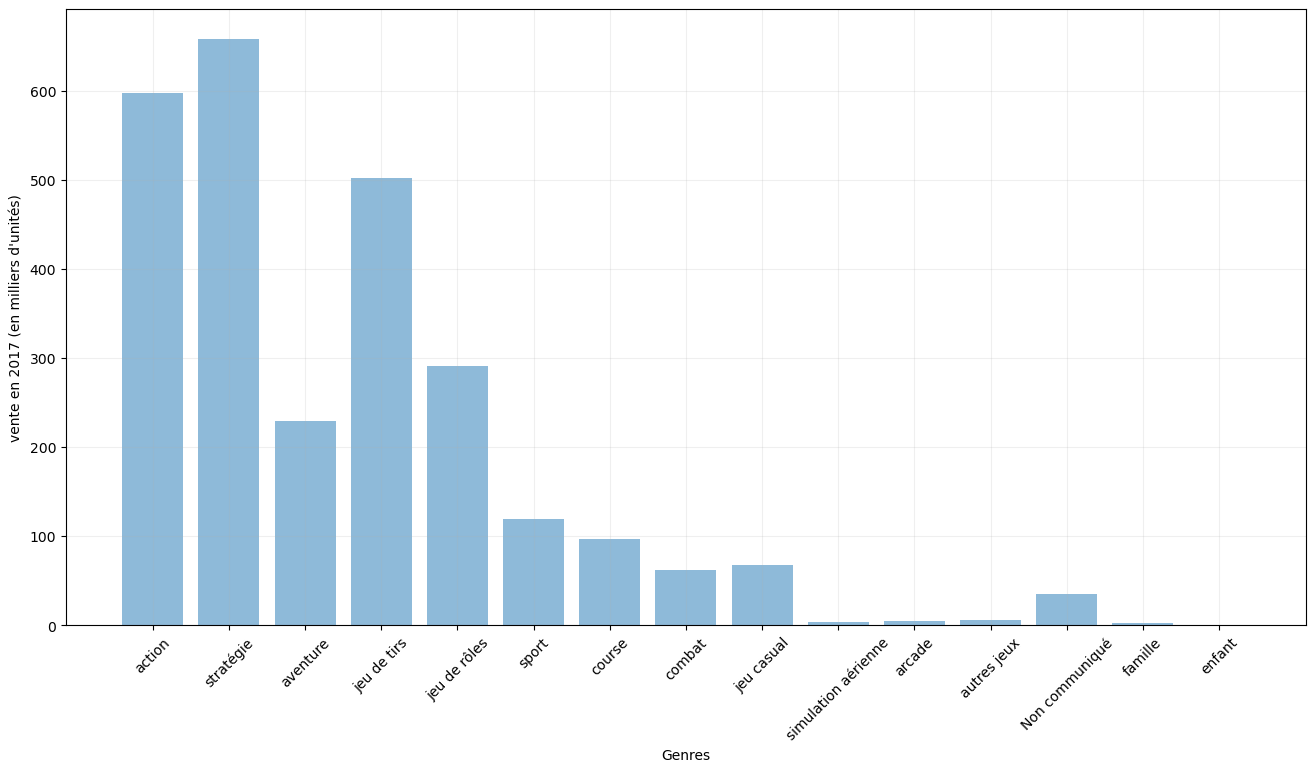

In [349]:
n_genre = len(df_genre)

# Définition de la taille de la figure en fonction de la taille du DF
plt.figure(figsize=(n_genre, 8))

plt.bar(df_genre.index[:-1], df_genre["2017"][:-1]/1000, alpha=0.5)  

plt.xlabel("Genres") 
plt.ylabel("vente en 2017 (en milliers d'unités)") 
plt.grid(True, alpha=0.2) #ajout d'une grille en arrière plan
plt.xticks(rotation=45)
plt.show()


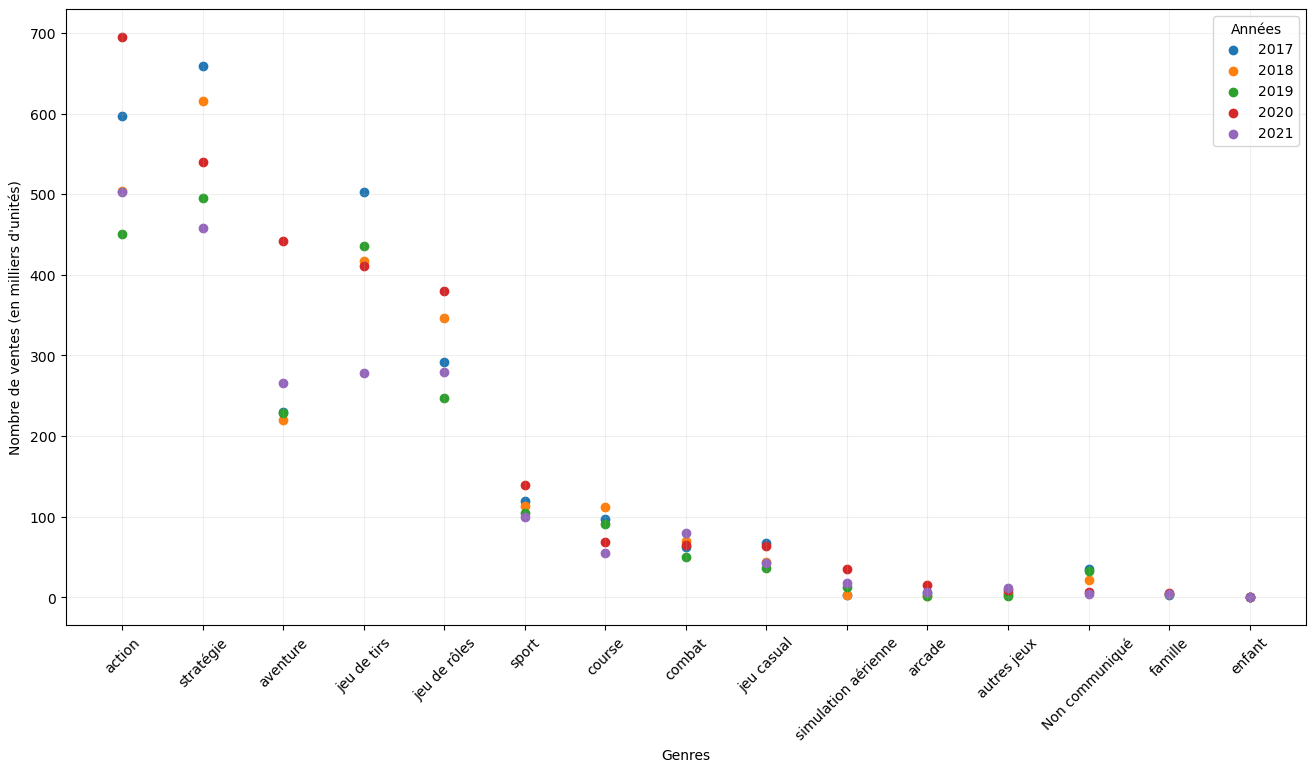

In [415]:
plt.figure(figsize=(n_genre, 8))


for year in df_genre.columns:
    plt.scatter(df_genre.index[:-1], df_genre[year][:-1]/1000, alpha=1, label=year)  

plt.xlabel("Genres") 
plt.ylabel("Nombre de ventes (en milliers d'unités)")
plt.legend(title="Années")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.2) #ajout d'une grille en arrière plan

plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_1372\2756599644.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(start_point[j] + value / 2, j, f'{int(value)}', va='center', ha='center', color='white')


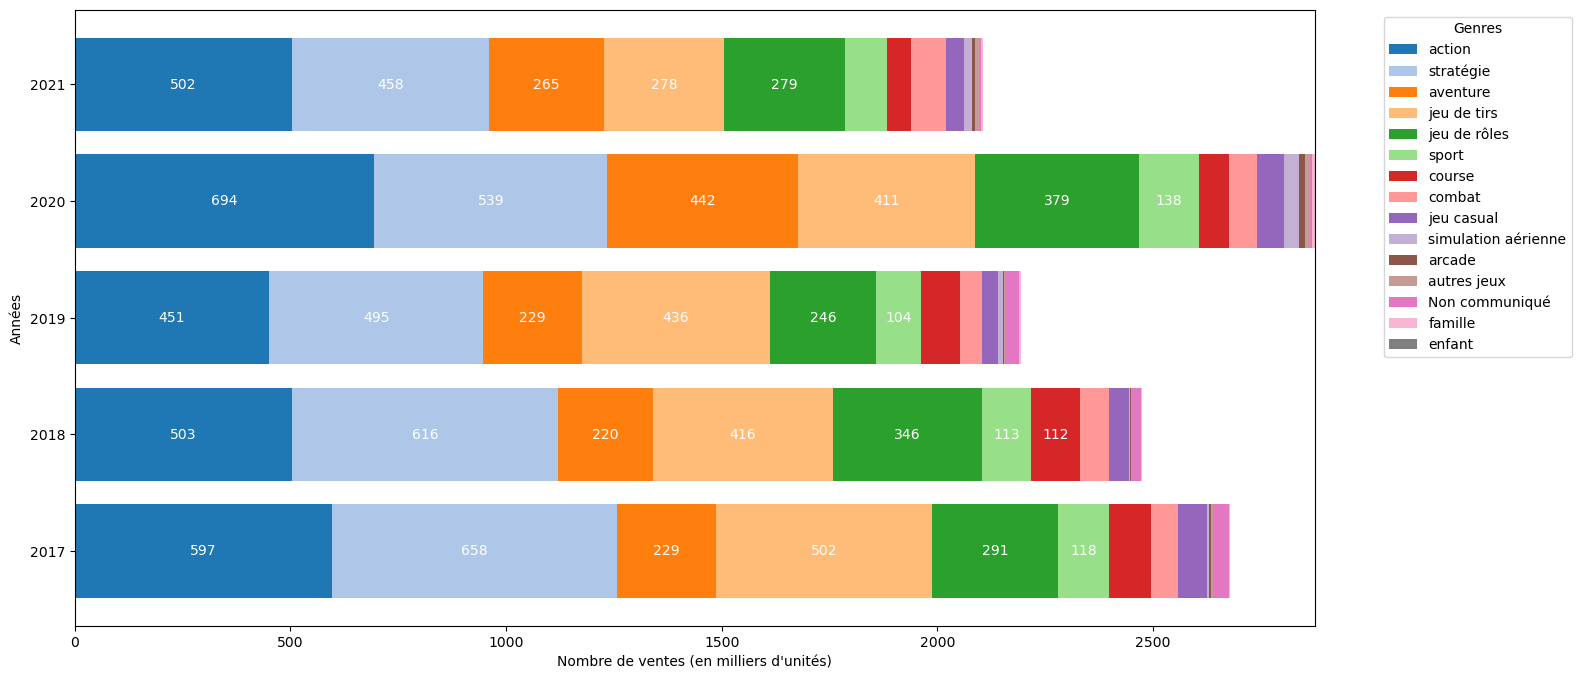

In [822]:
f, ax = plt.subplots(figsize=(n_genre, 8))
couleur = sns.color_palette("tab20", n_colors=len(df_genre) - 1)

start_point = np.zeros(len(df_genre.columns)) 


for i, genre in enumerate(df_genre.index[:-1]):
    values = df_genre.loc[genre] / 1000  
    ax.barh(y=df_genre.columns, width=values, left=start_point, color=couleur[i], label=genre)  
    
    for j, value in enumerate(values):
        if value > 100:  
            ax.text(start_point[j] + value / 2, j, f'{int(value)}', va='center', ha='center', color='white')
    start_point += values


ax.set(xlabel="Nombre de ventes (en milliers d'unités)", ylabel="Années")
ax.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')